In [ ]:
import numpy as np

# 1. Lineare Algebra

Lineare Algebra ist ein fundamentaler Baustein von Machine Learning.
Daher sind die Grundlagen und die Implementierung einiger Methoden interessant und wichtig.

Eine Matrix $M_{ij}$ (Zeile $i$ und Spalte $j$) können wir in Python mit einem 2 dimensionalem NumPy array sehr leicht darstellen.
Zum Beispiel folgende Telefonmatrix:

In [ ]:
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
M

Ein Vektor hingegenen, wird oft als 1 dimensionales NumPy array ausgedrückt:

In [ ]:
v = np.array([1, 2, 3])
v

Versuche nun das richtige Ergebnis per Hand auszurechnen. Du kannst es dann mit folgendem Befehl überprüfen:

In [ ]:
# trage auf der rechten Seite das richtige Ergebnis ein
np.all(np.dot(M, v) == np.array([0, 0, 0]))

In [ ]:
# trage auf der rechten Seite das richtige Ergebnis ein
np.all(np.dot(M, np.array([3,2,1])) == np.array([0, 0, 0]))

Man kann von einer Matrix auch das transponierte Bilden: $M'$

Was bedeutet das? Finde die Antwort mit `np.transpose`

In [ ]:
np.transpose

In [ ]:
# trage auf der rechten Seite das richtige Ergebnis ein
np.all(np.dot(np.transpose(M), np.array([-1,1,-0.5])) == np.array([0, 0, 0]))

Man kann nicht nur eine Matrix mit einem Vektor multiplizieren, sondern auch eine Matrix mit einer Matrix.
Berechne das Ergebnis der folgenden Operation:

In [ ]:
np.all(np.dot(M, M) == np.array([[0,0,0], [0,0,0], [0,0,0]]))

In [ ]:
np.all(np.dot(M, -M) == np.array([[0,0,0], [0,0,0], [0,0,0]]))

In [ ]:
np.all(np.dot(-M, -M) == np.array([[0,0,0], [0,0,0], [0,0,0]]))

In [ ]:
M1 = np.array([[-1, 1], [1, -1]])
M2 = np.array([[2, -2], [3, -1]])

np.all(np.dot(M1, M2) == np.array([[0,0,0], [0,0,0], [0,0,0]]))
np.all(np.dot(M2, M1) == np.array([[0,0,0], [0,0,0], [0,0,0]]))

# 2. Matrix-Vektor Multiplikation selbst gemacht

Wir haben nun verstanden wie man Matrix-Vektor Multiplikationen in NumPy berechnet.
Nun möchten wir einen einfachen (und langsamen) Algorithmus per Hand schreiben.

Überprüfe das Ergebnis

In [ ]:
# TODO
def mat_vec_mult(M, v):
    out = np.zeros(v.shape)
    
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            out[i] += M[i, j] * v[j]
            
    return out

In [ ]:
mat_vec_mult(M, v)

In [ ]:
np.matmul(M, v)

Teste nun mit 10 zufälligen Matrizen und Vektoren, dass der Algorithmus stimmt.
Benutze dafür `np.random.rand` und `np.equal` und eine for schleife 

In [ ]:
for i in range(10):
    M = np.random.rand(5,5)
    v = np.random.rand(5,)
    if not np.equal(mat_vec_mult(M, v), np.dot(M, v)).all():
        print("fail", i)
    

Anscheinend sind die Algorithmen nicht ganz gleich?
Woran liegt das?

Benutze statt `np.equal` `np.isclose`. Lies gerne die Dokumentation was diese Funktion macht.

In [ ]:
?np.equal

In [ ]:
for i in range(10):
    M = np.random.rand(5,5)
    v = np.random.rand(5,)
    if not np.isclose(mat_vec_mult(M, v), np.dot(M, v)).all():
        print("fail", i)

# 3. Matrix-Matrix Multiplikation

Schreibe einen Algorithmus, der Matrizen mit Matrizen multipliziert.

In [ ]:
def mat_mat_mult(A, B):
    C = np.zeros(A.shape)
    
    for k in range(M.shape[0]):
        for l in range(M.shape[1]):
            for m in range(M.shape[1]):
                C[k, m] += A[k, l] * B[l, m]
            
    return C

Definiere zwei passende Matrizen `A` und `B`.

In [ ]:
mat_mat_mult(A, B)

In [ ]:
np.matmul(A, B)

In [ ]:
%timeit mat_mat_mult(A, B)

In [ ]:
%timeit np.matmul(A, B)

Verbesserung von Linearen Algebra Operationen hat eine sehr lange Geschichte.

Zum Vergleich sieht man, dass unsere naive Implementierung sehr langsam ist. 

Das liegt einerseits an Python selbst, da NumPy effektiv Fortran Routinen aufruft, die deutlich schneller und effizienter sind.
Python ist eine sehr langsame Sprache, da sie interpretiert und nicht kompiliert ist.

Andererseits optimiert Fortran sehr stark für verschiedene CPU Architekturen und versucht Zugriffe auf Arbeitsspeicher und z.B. Cache Misses zu minimieren.

# 4. Mehr Matrixspaß

In [37]:
L1 = np.array([[0, -1],[1, 0]])

L2 = np.array([[0, 1],[-1, 0]])

In [38]:
# korrigiere die rechte Seite
np.all(np.dot(L1, L2) == np.array([[0,0], [0,0]]))

True

In [42]:
# korrigiere die rechte Seite
np.all(np.dot(L1, np.transpose(L1)) == np.array([[0,0],[0,0]]))

False

In [41]:
# korrigiere die rechte Seite
np.all(np.dot(L2, np.transpose(L2)) == np.array([[0,0],[0,0]]))

False

# 5. Rotationsmatrizen

Mache dich mit dem Konzept von Rotationsmatrizen bekannt: https://de.wikipedia.org/wiki/Drehmatrix

Du musst natürlich nicht alles lesen, sondern nur verstehen wie man diese berechnet.

Definiere nun eine Funktion, mit der man Rotationsmatrizen für beliebige Winkel berechnet.
Multipliziere diese zu verschiedenen Vektoren und visualisiere diese.

In [43]:
import matplotlib.pyplot as plt

In [44]:
def rotations_matrix(angle):
    return np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]])

In [45]:
rotations_matrix(0)

array([[ 1., -0.],
       [ 0.,  1.]])

In [46]:
rotations_matrix(np.pi/2)

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [47]:
rotations_matrix(3*np.pi/2)

array([[-1.8369702e-16,  1.0000000e+00],
       [-1.0000000e+00, -1.8369702e-16]])

In [48]:
rotations_matrix(np.pi)

array([[-1.0000000e+00, -1.2246468e-16],
       [ 1.2246468e-16, -1.0000000e+00]])

In [49]:
rotations_matrix(np.pi * 2)

array([[ 1.0000000e+00,  2.4492936e-16],
       [-2.4492936e-16,  1.0000000e+00]])

Zeige nun folgende Identitäten zuerst progammatisch, danach analytisch!

Wieso gilt das? Was ist die qualitative Begründung? Wie ist die mathematische?

`np.dot(rotations_matrix(alpha), rotations_matrix(beta)) = rotations_matrix(alpha + beta)`

Versuche nun mit `matplotlib` und den Funktionen `plt.axes` und `ax.arrow` Vektoren zu plotten.
Damit kannst du das Theorem von oben ebenfalls visualisieren.

In [50]:
v1 = np.array([1, 0])

In [51]:
def plot_vectors(vectors):
    ax = plt.axes()
    
    for v in vectors:
        ax.arrow(0, 0, v[0], v[1], head_width=0.2, color="b")

    plt.ylim(-5,5)
    plt.xlim(-5,5)

    plt.show()
    
    

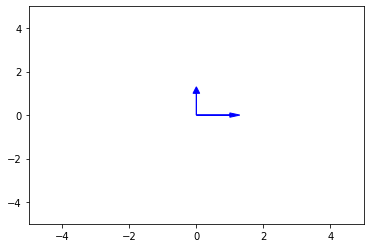

In [52]:
plot_vectors([v1, np.dot(rotations_matrix(np.pi/2), v1)])